<a href="https://colab.research.google.com/github/DevSingh28/sentiment_analyser/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download jp797498e/twitter-entity-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 65.8MB/s]


In [2]:
import zipfile
re = zipfile.ZipFile('twitter-entity-sentiment-analysis.zip')
re.extractall()
re.close()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
column_names = ['Tweet_Id', 'Entity', 'Sentiment', 'Tweet_content']

In [5]:
train_df = pd.read_csv('twitter_training.csv', header=None, names=column_names)
test_df = pd.read_csv('twitter_validation.csv', header=None, names=column_names)

In [6]:
train_df.shape, test_df.shape

((74682, 4), (1000, 4))

In [7]:
train_df.head()

,Tweet_Id,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
train_df.columns

Index(['Tweet_Id', 'Entity', 'Sentiment', 'Tweet_content'], dtype='object')

In [9]:
test_df.head()

,Tweet_Id,Entity,Sentiment,Tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [10]:
# Lets check for errors in this dataset if any, visualise it, and make our deep learning model


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_Id       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [12]:
train_df.isna().value_counts()

Tweet_Id  Entity  Sentiment  Tweet_content
False     False   False      False            73996
                             True               686
Name: count, dtype: int64

In [13]:
# In Tweet_content their are 686 nan values (Drop it or replace it with '')
# I am going to drop it
train_df.dropna(inplace=True)

In [14]:
train_df.isna().sum()

Tweet_Id         0
Entity           0
Sentiment        0
Tweet_content    0
dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

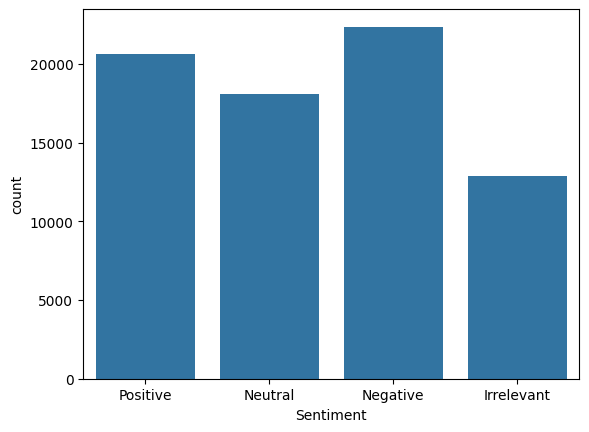

In [15]:
sns.countplot(x='Sentiment', data=train_df)

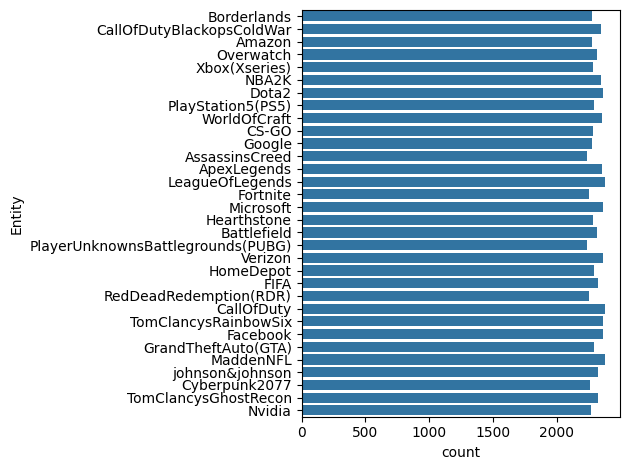

In [16]:
sns.countplot(y='Entity', data=train_df)
plt.tight_layout()

In [17]:
# Let's start creating model i am goint to user tensorflow and nlp for this

In [18]:
# I don't require tweet id so i am going to drop it

In [19]:
train_df.drop('Tweet_Id', axis=1, inplace=True)

In [20]:
# Lets use a better approach create another column with that combine both Entity and tweet content

In [21]:
train_df['Combained'] = train_df['Entity'] + ' ' + train_df['Tweet_content']

In [22]:
train_df['Combained'][0]

'Borderlands im getting on borderlands and i will murder you all ,'

In [23]:
X = train_df['Combained']
y = train_df['Sentiment']

In [24]:
type(X), type(y)

(pandas.core.series.Series, pandas.core.series.Series)

In [25]:
X = train_df['Combained'].values
y = train_df['Sentiment'].values

In [26]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((51797,), (22199,), (51797,), (22199,))

In [29]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [30]:
round(sum([len(i.split()) for i in X])/len(X))

20

In [31]:
text_vect = TextVectorization(max_tokens=None, standardize='lower_and_strip_punctuation', split='whitespace', ngrams=None, output_mode='int', output_sequence_length=None, pad_to_max_tokens=False)

In [32]:
text_vect = TextVectorization(max_tokens=10000, output_sequence_length=25, output_mode='int', pad_to_max_tokens=True)

In [33]:
text_vect.adapt(X_train)

In [34]:
text_vect(X_train[0])

<tf.Tensor: shape=(25,), dtype=int64, numpy=
array([  61,   61,  338,   35,  998,   18,    8,   19,   84,   30,   81,
         57,  736,   97,  194, 9655,  144,    6,  609,  444,  561,  585,
          0,    0,    0])>

In [35]:
# To make model better

from tensorflow.keras import layers
emb = layers.Embedding(input_dim=10000, output_dim=128, input_length=25)

In [36]:
emb(text_vect(X_train[0]))

<tf.Tensor: shape=(25, 128), dtype=float32, numpy=
array([[ 0.04674349, -0.02794964, -0.02047095, ...,  0.01211715,
         0.02696922,  0.03854099],
       [ 0.04674349, -0.02794964, -0.02047095, ...,  0.01211715,
         0.02696922,  0.03854099],
       [ 0.02754689,  0.04450114, -0.03705623, ..., -0.00490173,
         0.02862544,  0.00043871],
       ...,
       [ 0.0098626 ,  0.01227431,  0.02675984, ...,  0.04264554,
         0.03817226, -0.02750953],
       [ 0.0098626 ,  0.01227431,  0.02675984, ...,  0.04264554,
         0.03817226, -0.02750953],
       [ 0.0098626 ,  0.01227431,  0.02675984, ...,  0.04264554,
         0.03817226, -0.02750953]], dtype=float32)>

In [37]:
# Let's try this with inbuild model first i.e. naive bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
pipe = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

In [40]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', MultinomialNB())])

In [41]:
pred = pipe.predict(X_test)

In [42]:
print(pred[:10])

['Negative' 'Neutral' 'Negative' 'Negative' 'Irrelevant' 'Negative'
 'Negative' 'Positive' 'Neutral' 'Negative']


In [43]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

  Irrelevant       0.95      0.37      0.53      3899
    Negative       0.65      0.90      0.75      6655
     Neutral       0.85      0.61      0.71      5409
    Positive       0.69      0.83      0.75      6236

    accuracy                           0.72     22199
   macro avg       0.78      0.68      0.69     22199
weighted avg       0.76      0.72      0.70     22199



[[1440 1244  216  999]
 [  24 5994  160  477]
 [  30 1208 3311  860]
 [  29  846  216 5145]]


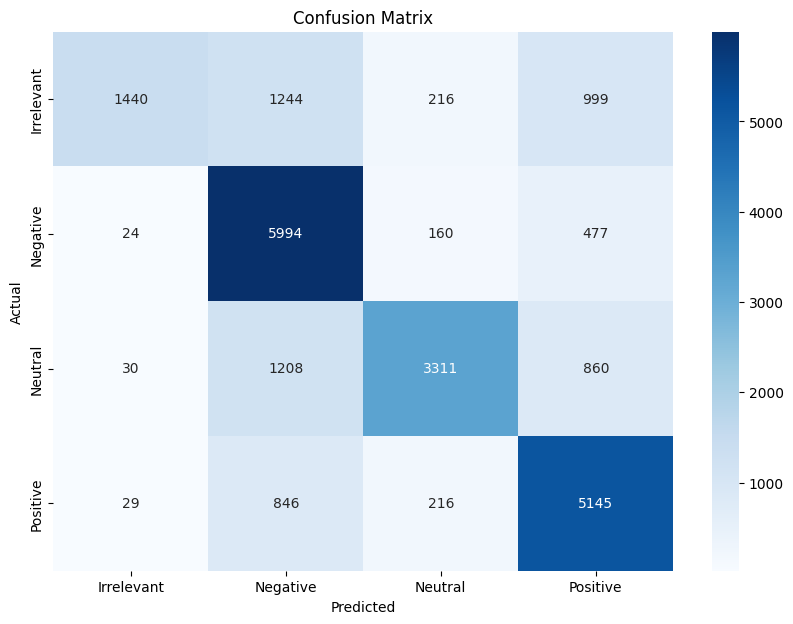

In [44]:
labels = ['Irrelevant', 'Negative', 'Neutral', 'Positive']

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [45]:
#Function to test the model

def predict_sentiment(input_text):
    prediction = pipe.predict([input_text])
    return prediction[0]

In [46]:
user_input = "Have a good day sir"
predicted_sentiment = predict_sentiment(user_input)
print(f"The predicted sentiment is: {predicted_sentiment}")

The predicted sentiment is: Positive


In [47]:
# 72% accuracy by using Naive Bayse good. But lets create our LSTM model (Deep Learning....)

In [48]:
import tensorflow as tf
from tensorflow.keras import layers

In [49]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vect(inputs)
x = emb(x)
x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128)(x)
outputs = layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [50]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 25)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 25, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 25, 128)           131584    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 4)                 516       
                                                             

In [51]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [52]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
path = '/content/model_saver'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=path, monitor='val_loss', save_best_only=True, save_weights_only=True)

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [54]:
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [55]:
type(X_test), type(X_train), type(y_test), type(y_train)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [56]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early, checkpoint])

Epoch 1/10
1619/1619 [==============================] - 37s 20ms/step - loss: 0.9361 - accuracy: 0.6232 - val_loss: 0.7497 - val_accuracy: 0.7190
Epoch 2/10
1619/1619 [==============================] - 18s 11ms/step - loss: 0.5611 - accuracy: 0.7954 - val_loss: 0.5977 - val_accuracy: 0.7834
Epoch 3/10
1619/1619 [==============================] - 18s 11ms/step - loss: 0.3973 - accuracy: 0.8560 - val_loss: 0.5532 - val_accuracy: 0.8022
Epoch 4/10
1619/1619 [==============================] - 16s 10ms/step - loss: 0.2989 - accuracy: 0.8907 - val_loss: 0.5228 - val_accuracy: 0.8176
Epoch 5/10
1619/1619 [==============================] - 16s 10ms/step - loss: 0.2397 - accuracy: 0.9123 - val_loss: 0.5338 - val_accuracy: 0.8248
Epoch 6/10
1619/1619 [==============================] - 16s 10ms/step - loss: 0.1998 - accuracy: 0.9243 - val_loss: 0.5761 - val_accuracy: 0.8326


In [57]:
model.evaluate(X_test, y_test)

694/694 [==============================] - 5s 8ms/step - loss: 0.5761 - accuracy: 0.8326


[0.576088011264801, 0.8325600028038025]

In [58]:
def predictor(input_text):
    input_text = np.array([input_text])
    prediction = model.predict(input_text)
    sentiment = le.inverse_transform([np.argmax(prediction)])
    return sentiment[0]

user_input = "Have a good day sir"
predicted_sentiment = predict_sentiment(user_input)
print(f"The predicted sentiment is: {predicted_sentiment}")

The predicted sentiment is: Positive


In [60]:
user_input = "Go to hell"
predicted_sentiment = predict_sentiment(user_input)
print(f"The predicted sentiment is: {predicted_sentiment}")

The predicted sentiment is: Negative
